# Feature Engineering

1. Select low/high-variance variables
2. Dropping redundant variables
3. RFE

In [ ]:
import pandas as pd
import dslabs_functions as dslabs
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from matplotlib.pyplot import subplots, show
from matplotlib.pyplot import savefig, figure

## tratar da primeira coluna nos notebooks anteriores
winning_alternative_scaling = 2
folder = "feat_eng_csvs"
filename = f'../data_preparation_csvs/scaling_csvs/data_scaled_minmax_alt2.csv'
data_scaling: pd.DataFrame = pd.read_csv(filename, sep=',', decimal='.', na_values='')
print(f"Dataset nr records={data_scaling.shape[0]}", f"nr variables={data_scaling.shape[1]}")
filename_prefix = "../data_preparation_csvs/outliers_treatment_csvs/feature_eng_"

train = pd.read_csv('../data_preparation_csvs/scaling_csvs/train_data_scaled_minmax_alt2.csv')
test = pd.read_csv('../data_preparation_csvs/scaling_csvs/test_data_scaled_minmax_alt2.csv')

In [ ]:
# Save to file
def save(df, name):
    df.to_csv(f'{filename_prefix}{name}_data.csv', index=False)

    ## Separate into Train and Test and save in different files
    train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

    ## Save the training and testing sets to CSV files
    train_data.to_csv(f'../data_preparation_csvs/{folder}/train_data_mv_{name}.csv', index=False)
    test_data.to_csv(f'../data_preparation_csvs/{folder}/test_data_mv_{name}.csv', index=False)

    ## Evaluate Approach
    file_tag = "Credit_Score"
    target = "Credit_Score"

    figure()
    eval: dict[str, list] = dslabs.evaluate_approach(train_data, test_data, target=target, metric="recall")
    dslabs.plot_multibar_chart(
        ["NB", "KNN"], eval, title=f"{file_tag} evaluation", percentage=True
    )
    savefig(f"../data_preparation_images/{folder}_result/data_mv_{name}_eval.png")
    show()

In [ ]:
target = "Credit_Score"
file_tag = "Credit_Score"
print("Original variables", train.columns.to_list())
vars2drop: list[str] = dslabs.select_low_variance_variables(train, 0.015, target=target)
print("Variables to drop", vars2drop)

In [ ]:
target = "Credit_Score"
file_tag = "Credit_Score"

eval_metric = "recall"
figure(figsize=(2 * dslabs.HEIGHT, dslabs.HEIGHT))
dslabs.study_variance_for_feature_selection(
    train,
    test,
    target=target,
    max_threshold=0.1,
    lag=0.005,
    metric=eval_metric,
    file_tag=file_tag,
)
show()

In [61]:
print("Original variables", train.columns.values)
vars2drop: list[str] = dslabs.select_redundant_variables(
    train, target=target, min_threshold=0.5
)
print("Variables to drop", vars2drop)

Original variables ['Month' 'Occupation' 'Payment_of_Min_Amount' 'CreditMix'
 'Payment_Behaviour' 'Payday Loan' 'Personal Loan'
 'Debt Consolidation Loan' 'Auto Loan' 'Not Specified Loan' 'Student Loan'
 'Credit-Builder Loan' 'Mortgage Loan' 'Home Equity Loan' 'Age'
 'Annual_Income' 'Monthly_Inhand_Salary' 'Num_Bank_Accounts'
 'Num_Credit_Card' 'Interest_Rate' 'NumofLoan' 'Delay_from_due_date'
 'NumofDelayedPayment' 'ChangedCreditLimit' 'NumCreditInquiries'
 'OutstandingDebt' 'CreditUtilizationRatio' 'Credit_History_Age'
 'TotalEMIpermonth' 'Amountinvestedmonthly' 'MonthlyBalance'
 'Credit_Score']
Variables to drop ['CreditMix', 'Credit_History_Age', 'Payment_of_Min_Amount', 'Delay_from_due_date', 'OutstandingDebt']


FileNotFoundError: [Errno 2] No such file or directory: 'images/Credit_Score_fs_redundancy_recall_study.png'

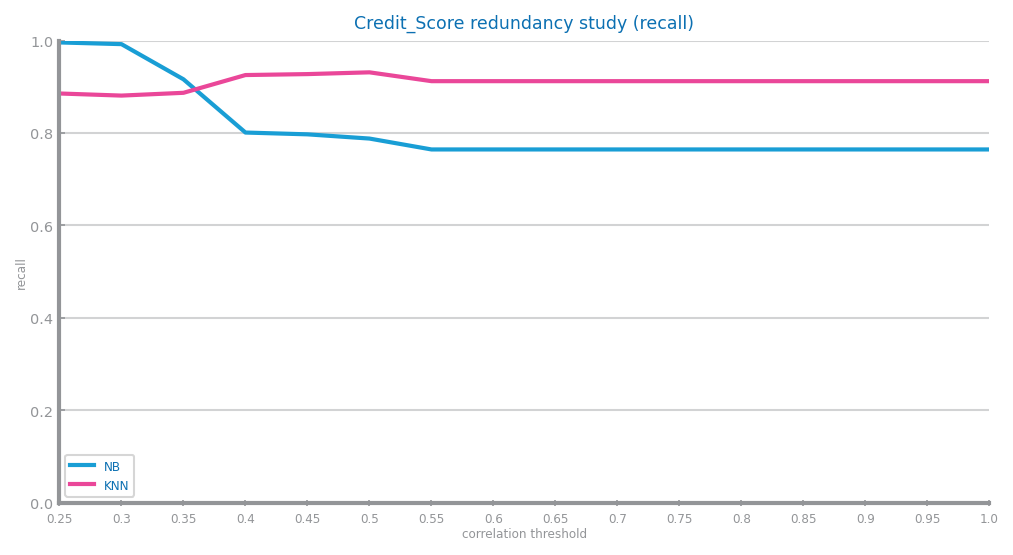

In [63]:
eval_metric = "recall"

figure(figsize=(2 * dslabs.HEIGHT, dslabs.HEIGHT))
dslabs.study_redundancy_for_feature_selection(
    train,
    test,
    target=target,
    min_threshold=0.25,
    lag=0.05,
    metric=eval_metric,
    file_tag=file_tag,
)
show()